In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an example image
image_path = 'im3.webp'
image = cv2.imread(image_path)

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3)).astype(np.float32) # (row, column); row = -1 means numpy will automatically compute the required value to have the same number of elements

max_iteration = 1

# Add another column of zeros
labels = np.zeros(len(pixels))

# Number of clusters
k = 3

# Initialize the means as centers
centers = np.random.randint(0, 256, (k, 3)).astype(np.float32)

for iteration in range(max_iteration):

    # Euclidean Distance
    def euclidean_distance(point1, point2):
        # Convert points to NumPy arrays for element-wise operations
        point1 = np.array(point1)
        point2 = np.array(point2)

        # Calculate the Euclidean distance
        distance = np.sqrt(np.sum((point2 - point1)**2))
        return distance

    # Clustering the pixels
    dist = -1
    for i in range(len(pixels)):
        for j in range(k):
            distance = euclidean_distance(centers[j, :], pixels[i, :])
            if distance >= dist:
                dist = distance
                labels[i] = j

    # Updating the means matrix
    for i in range(k):
        denom = 0
        numer = np.zeros(len(pixels[0]))
        for j in range(len(pixels)):
            if i == labels[j]:
                for l in range(len(pixels[0])):
                    denom = denom + 1
                    numer[l] = numer[l] + pixels[j, l]
        for m in range(len(centers[0])):
            centers[i, m] = numer[m] // denom

# Last portion
seg_pixels = pixels.copy()
for i in range(k):
    for j in range(len(pixels)):
        if i == labels[j]:
            for l in range(len(pixels[0])):
                seg_pixels[j, l] = centers[i, l]

segmented_image = seg_pixels.reshape(image.shape).astype(np.uint8)

# Display the original and segmented images
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image')
plt.show()

KeyboardInterrupt: 

done


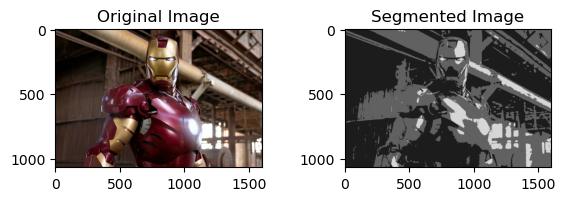

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an example image
image_path = 'im3.webp'
image = cv2.imread(image_path)

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3)).astype(np.float32)  # (row, column); row = -1 means numpy will automatically compute the required value to have the same number of elements
seg_pixels = np.copy(pixels)
max_iteration = 1

# Add another column of zeros
labels = np.zeros(len(pixels))

# Number of clusters
k = 3

# Initialize the means as centers
centers = np.random.randint(0, 256, (k, 3)).astype(np.float32)

# Euclidean Distance
def euclidean_distance(point1, point2):
    # Convert points to NumPy arrays for element-wise operations
    point1 = np.array(point1)
    point2 = np.array(point2)

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point2 - point1)**2))
    return distance

# K-Means clustering
denom = np.zeros(k)
numer = np.zeros((k,3))
for iteration in range(max_iteration):
    # Assign each pixel to the nearest cluster
    for i in range(len(pixels)):
        for j in range(k):
            distance = euclidean_distance(centers[j, :], pixels[i, :])
            if j == 0:
                dist = distance
            else:
                if distance <= dist:
                    dist = distance
                    labels[i] = j
    #upgrading the centers
    for i in range(k):
        centers[i,:] = np.mean(pixels[labels==i])

# Reshape the labels to the shape of the original image
segmented_image = centers[labels.astype(int)].reshape(image.shape).astype(np.uint8)

# Display the original and segmented images
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image')
plt.subplots_adjust(wspace=0.4)        
print('done')